# kNN-regressor, выбор метрики и boston-dataset

### Мы будем использовать в данном задании набор данных Boston, где нужно предсказать стоимость жилья на основе различных характеристик расположения (загрязненность воздуха, близость к дорогам и т.д.). Данное задание основано на лекциях по метрическим методам и посвящено выбору наилучшей метрики для конкретной задачи, а точнее параметра метрики. 

In [6]:
import numpy as np
import pandas as pd

In [7]:
from sklearn.datasets import load_boston
boston = load_boston()
boston

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
         4.9800e+00],
        [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
         9.1400e+00],
        [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
         4.0300e+00],
        ...,
        [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         5.6400e+00],
        [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
         6.4800e+00],
        [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
         7.8800e+00]]),
 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
        18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
        15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
        13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
        21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
        35.4, 24.7, 3

In [8]:
X=boston.data
y=boston.target

In [9]:
from sklearn.preprocessing import scale
X=scale(X)

In [11]:
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsRegressor

### В задании указано использовать метрику Minkowski:
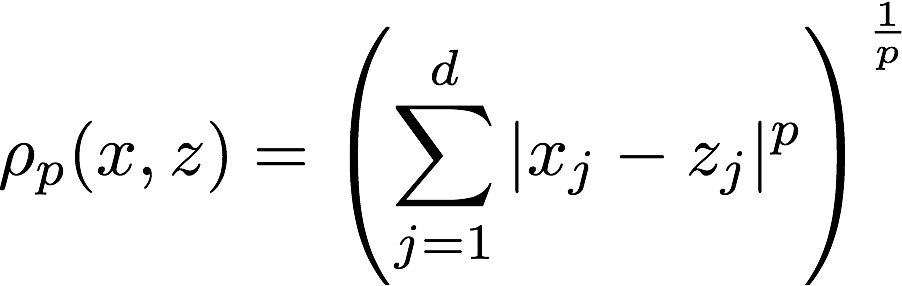

In [18]:
m=-100000000 #костыльненько, но ладно...
for p in np.linspace(1, 10, num = 200):
    Regressor=KNeighborsRegressor(n_neighbors=5, p=p, metric='minkowski', weights='distance')
    kf = KFold(n_splits=5, shuffle=True, random_state=42)
    j=(cross_val_score(Regressor, X, y, scoring='neg_mean_squared_error',cv=kf)).mean() #Усредняем, чтобы оценить качество
    if j>m:
        pmax=p
        m=j
    #print("p =",p,j)

p = 1.0 -16.050208508436157
p = 1.0452261306532664 -16.40408060146483
p = 1.0904522613065326 -16.3672292228676
p = 1.135678391959799 -16.44253878688061
p = 1.1809045226130652 -16.45528061997623
p = 1.2261306532663316 -16.506563205397523
p = 1.271356783919598 -16.616752338213843
p = 1.3165829145728645 -16.801911994883252
p = 1.3618090452261307 -16.843957376606987
p = 1.4070351758793969 -17.094610632323953
p = 1.4522613065326633 -17.120015107405457
p = 1.4974874371859297 -16.951350081281447
p = 1.542713567839196 -17.088926677224585
p = 1.5879396984924623 -16.79108042821987
p = 1.6331658291457287 -16.970883601336944
p = 1.678391959798995 -17.006163956912417
p = 1.7236180904522613 -17.15425530464287
p = 1.7688442211055277 -17.171594667922264
p = 1.814070351758794 -17.20017316562592
p = 1.8592964824120604 -17.319404221315445
p = 1.9045226130653266 -17.410890278357563
p = 1.949748743718593 -17.382596582959618
p = 1.9949748743718594 -17.323538455302504
p = 2.040201005025126 -17.36459592985824

p = 9.954773869346734 -21.065408486293077
p = 10.0 -21.08661734299111


In [19]:
 print(pmax,m) # результат

1.0 -16.050208508436157


### Лучший результат при p=1. Интересно, что евклидова метрика (p=2) — не самый лучший вариант для этой задачи:

In [20]:
Regressor=KNeighborsRegressor(n_neighbors=5, p=2, metric='minkowski', weights='distance')
j=(cross_val_score(Regressor, X, y, scoring='neg_mean_squared_error',cv=kf)).mean() 
j

-17.33663788425967